In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis 
from sklearn.decomposition import PCA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

In [ ]:
data.head()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.tail()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
data.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


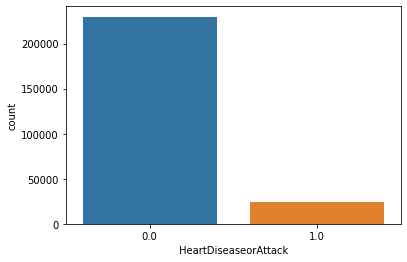

In [ ]:
sns.countplot(data["HeartDiseaseorAttack"])
print(data.HeartDiseaseorAttack.value_counts())

In [ ]:
countFemale = len(data[data.Sex == 0])
countMale = len(data[data.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.Sex))*100)))

Percentage of Female Patients: 55.97%
Percentage of Male Patients: 44.03%


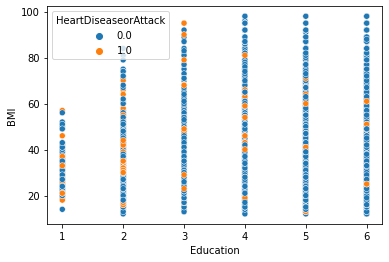

In [ ]:
sns.scatterplot(data = data , x ='Education' , y ='BMI',hue = 'HeartDiseaseorAttack')

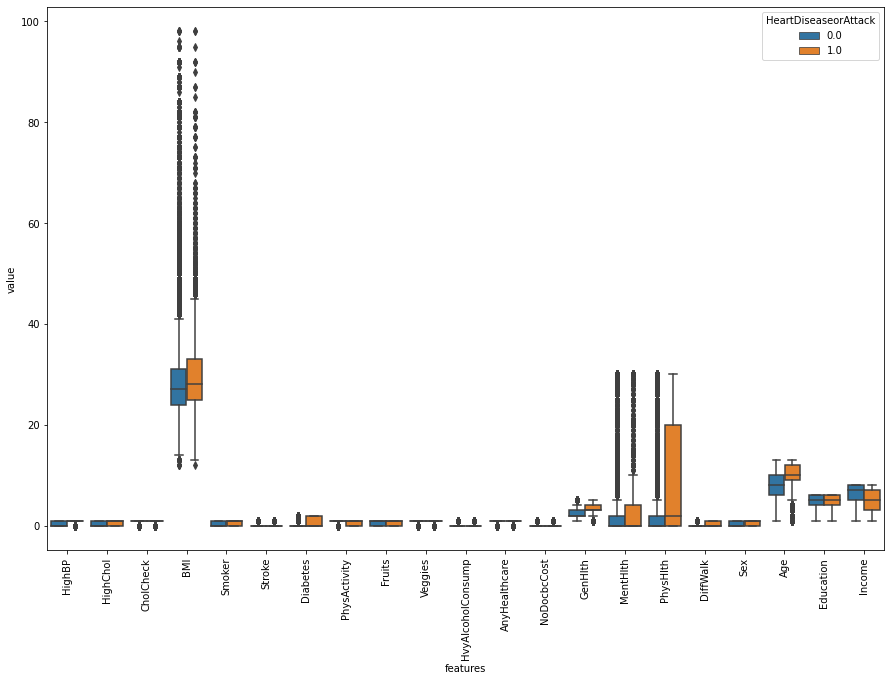

In [ ]:
# box plot 
data_melted = pd.melt(data, id_vars = "HeartDiseaseorAttack",
                      var_name = "features",
                      value_name = "value")

plt.figure(figsize=(15,10))
sns.boxplot(x = "features", y = "value", hue = "HeartDiseaseorAttack", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

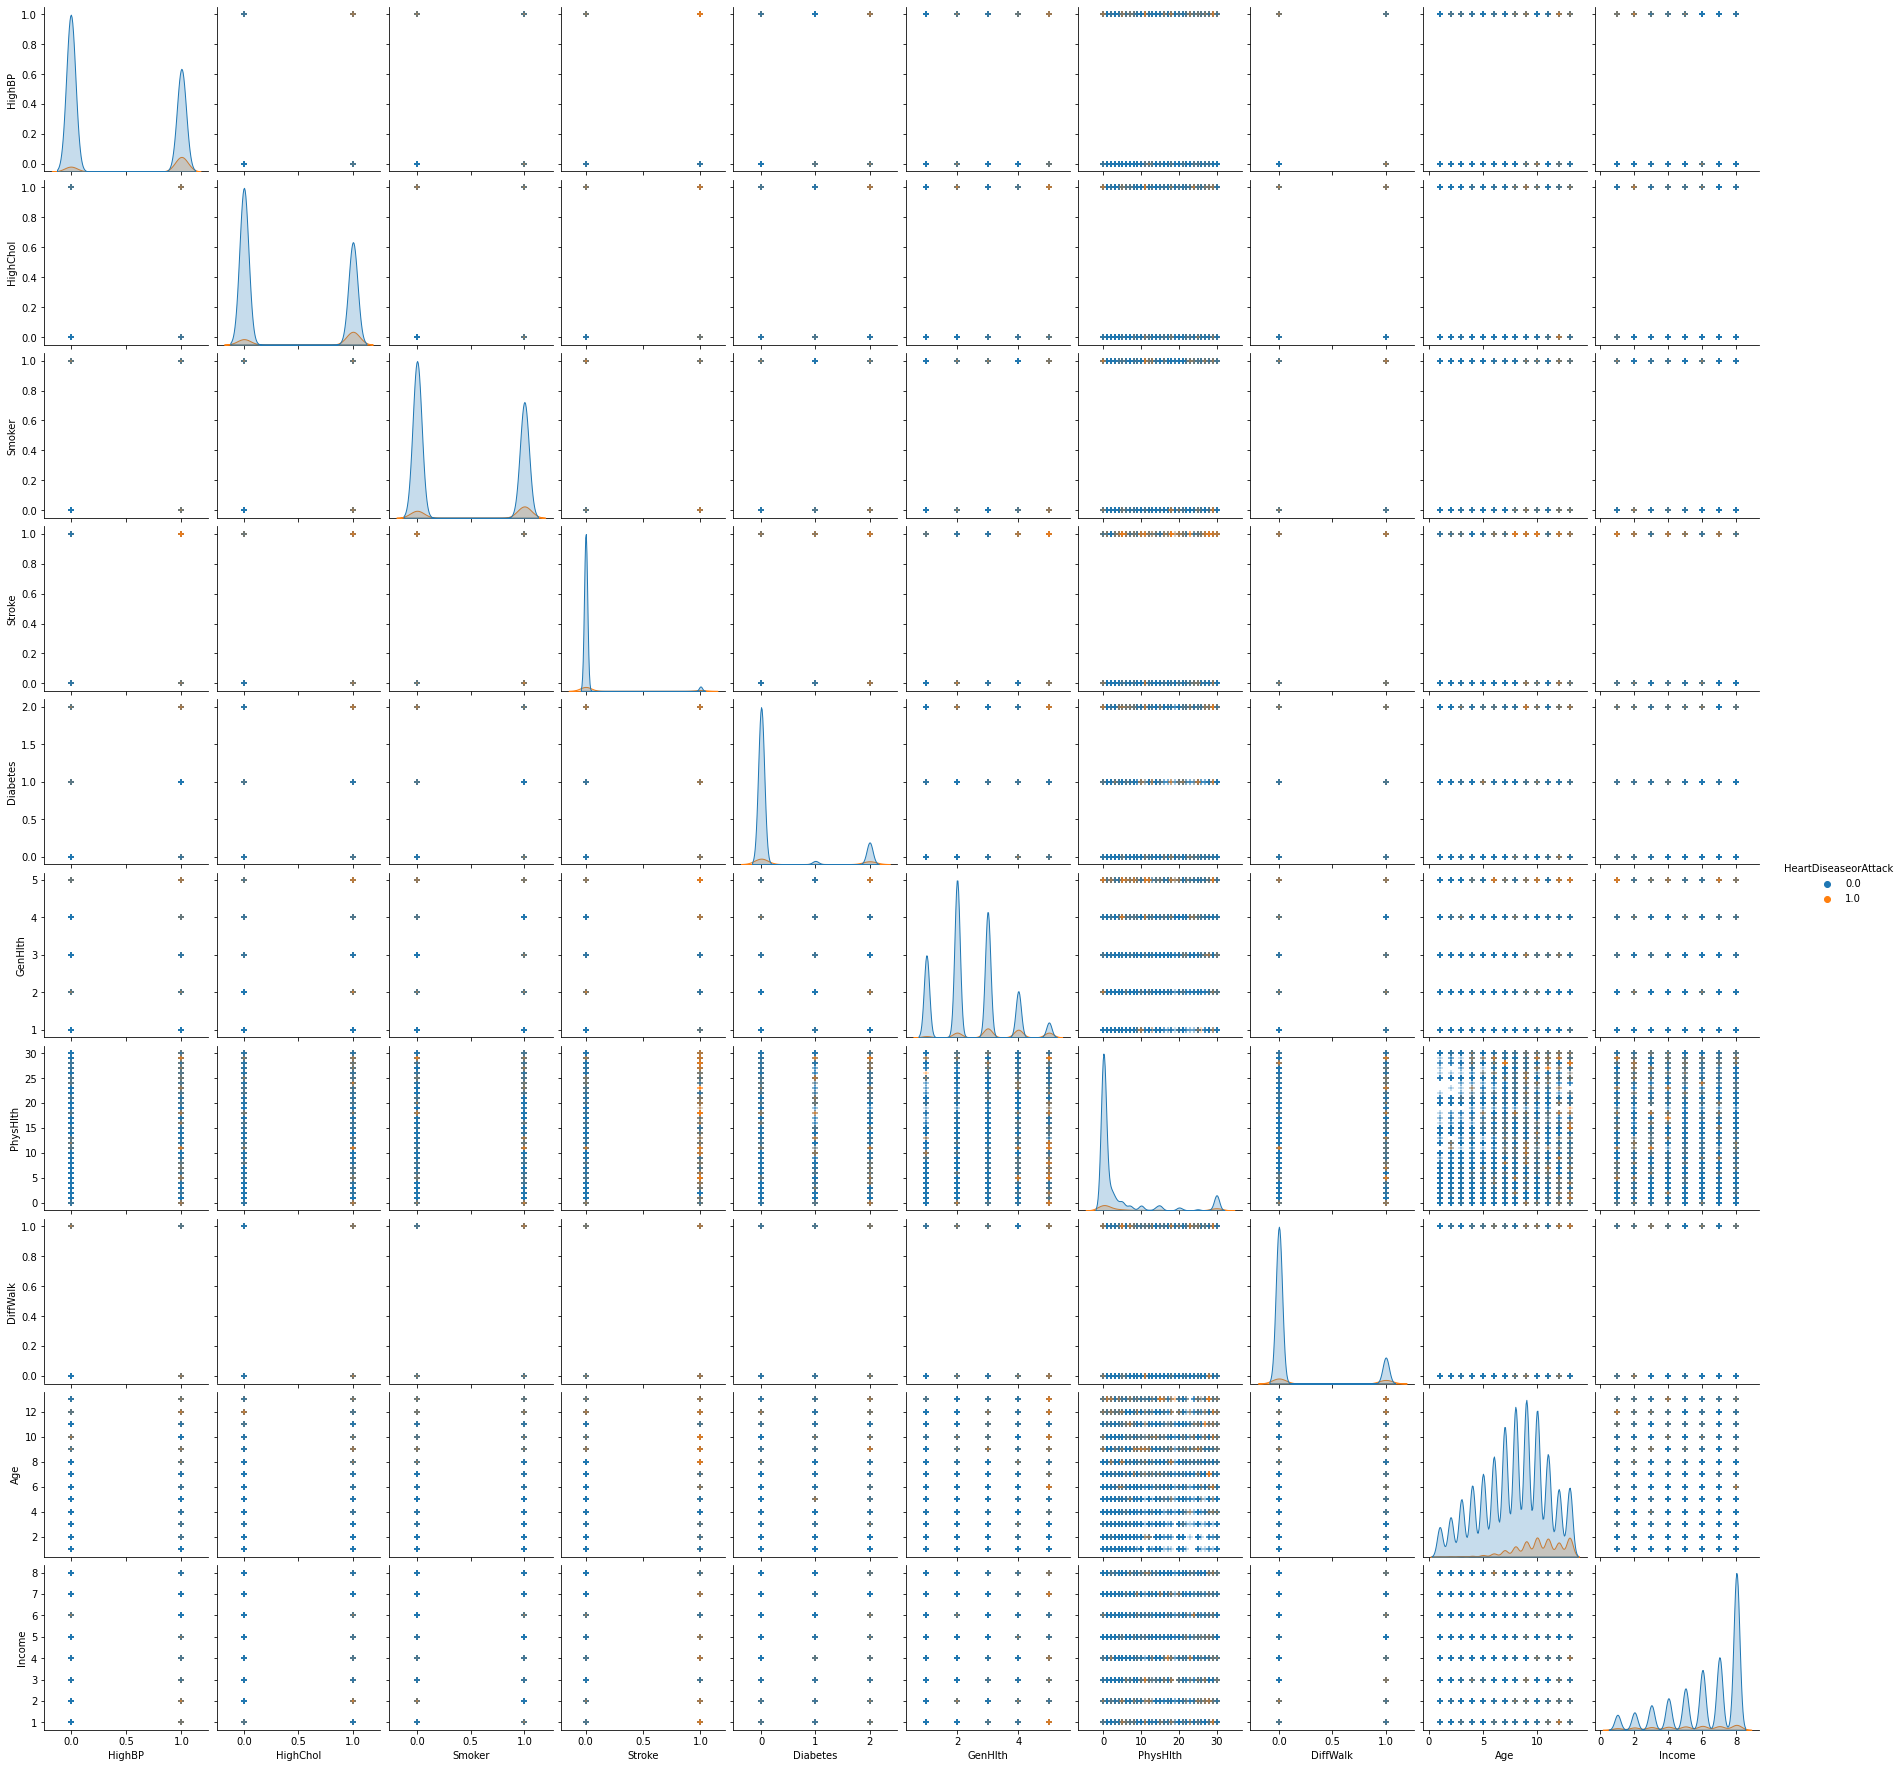

In [ ]:
# pair plot 
threshold = 0.1
corr_matrix = data.corr()
filtre = np.abs(corr_matrix["HeartDiseaseorAttack"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+",hue = "HeartDiseaseorAttack")
plt.show()


In [ ]:
y = data.HeartDiseaseorAttack
x = data.drop(["HeartDiseaseorAttack"],axis = 1)
columns = x.columns.tolist()
columns

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["HeartDiseaseorAttack"] = Y_train

In [ ]:
X_train_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
0,1.154833,1.166958,0.197184,0.999957,-0.892352,-0.205497,2.434050,0.566702,0.759095,0.481490,...,-0.303253,2.326777,-0.429943,1.115661,2.222564,-0.886350,1.299963,-2.076225,-2.435560,0.0
1,1.154833,1.166958,0.197184,1.302039,1.120634,-0.205497,-0.426006,0.566702,0.759095,0.481490,...,-0.303253,0.456043,-0.429943,-0.258135,-0.449931,1.128222,0.972501,-0.049800,-1.471073,NaN
2,-0.865926,-0.856929,0.197184,-0.057333,-0.892352,-0.205497,-0.426006,0.566702,0.759095,0.481490,...,-0.303253,-0.479325,-0.429943,-0.487102,-0.449931,-0.886350,-0.992273,0.963412,0.940143,0.0
3,-0.865926,-0.856929,0.197184,-0.812540,-0.892352,-0.205497,-0.426006,0.566702,0.759095,0.481490,...,-0.303253,0.456043,-0.429943,-0.487102,-0.449931,1.128222,-1.974660,0.963412,0.940143,0.0
4,-0.865926,-0.856929,0.197184,0.244750,1.120634,-0.205497,-0.426006,0.566702,-1.317358,0.481490,...,-0.303253,-0.479325,-0.429943,0.085314,-0.449931,1.128222,-0.337348,-1.063012,0.457900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177571,1.154833,-0.856929,0.197184,2.510370,1.120634,-0.205497,-0.426006,0.566702,0.759095,-2.076888,...,3.297578,-1.414692,1.589835,-0.487102,-0.449931,-0.886350,-0.992273,-1.063012,-2.435560,0.0
177572,1.154833,1.166958,0.197184,0.093708,1.120634,-0.205497,-0.426006,0.566702,-1.317358,0.481490,...,-0.303253,0.456043,-0.429943,-0.487102,-0.449931,1.128222,0.972501,0.963412,0.457900,NaN
177573,-0.865926,1.166958,0.197184,-0.510457,-0.892352,-0.205497,-0.426006,0.566702,0.759095,0.481490,...,-0.303253,-0.479325,-0.429943,-0.143652,-0.449931,-0.886350,0.317576,0.963412,0.940143,0.0
177574,-0.865926,-0.856929,-5.071413,-0.812540,-0.892352,-0.205497,-0.426006,-1.764594,0.759095,0.481490,...,3.297578,-0.479325,-0.429943,-0.487102,-0.449931,-0.886350,-0.992273,0.963412,-0.024344,0.0


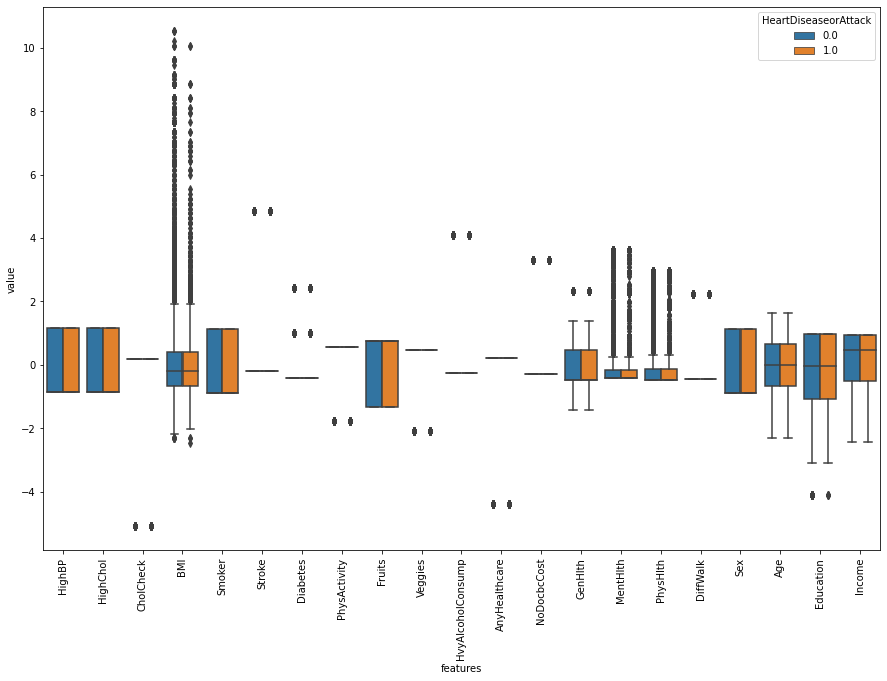

In [ ]:
# box plot 
data_melted = pd.melt(X_train_df, id_vars = "HeartDiseaseorAttack",
                      var_name = "features",
                      value_name = "value")

plt.figure(figsize=(15,10))
sns.boxplot(x = "features", y = "value", hue = "HeartDiseaseorAttack", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

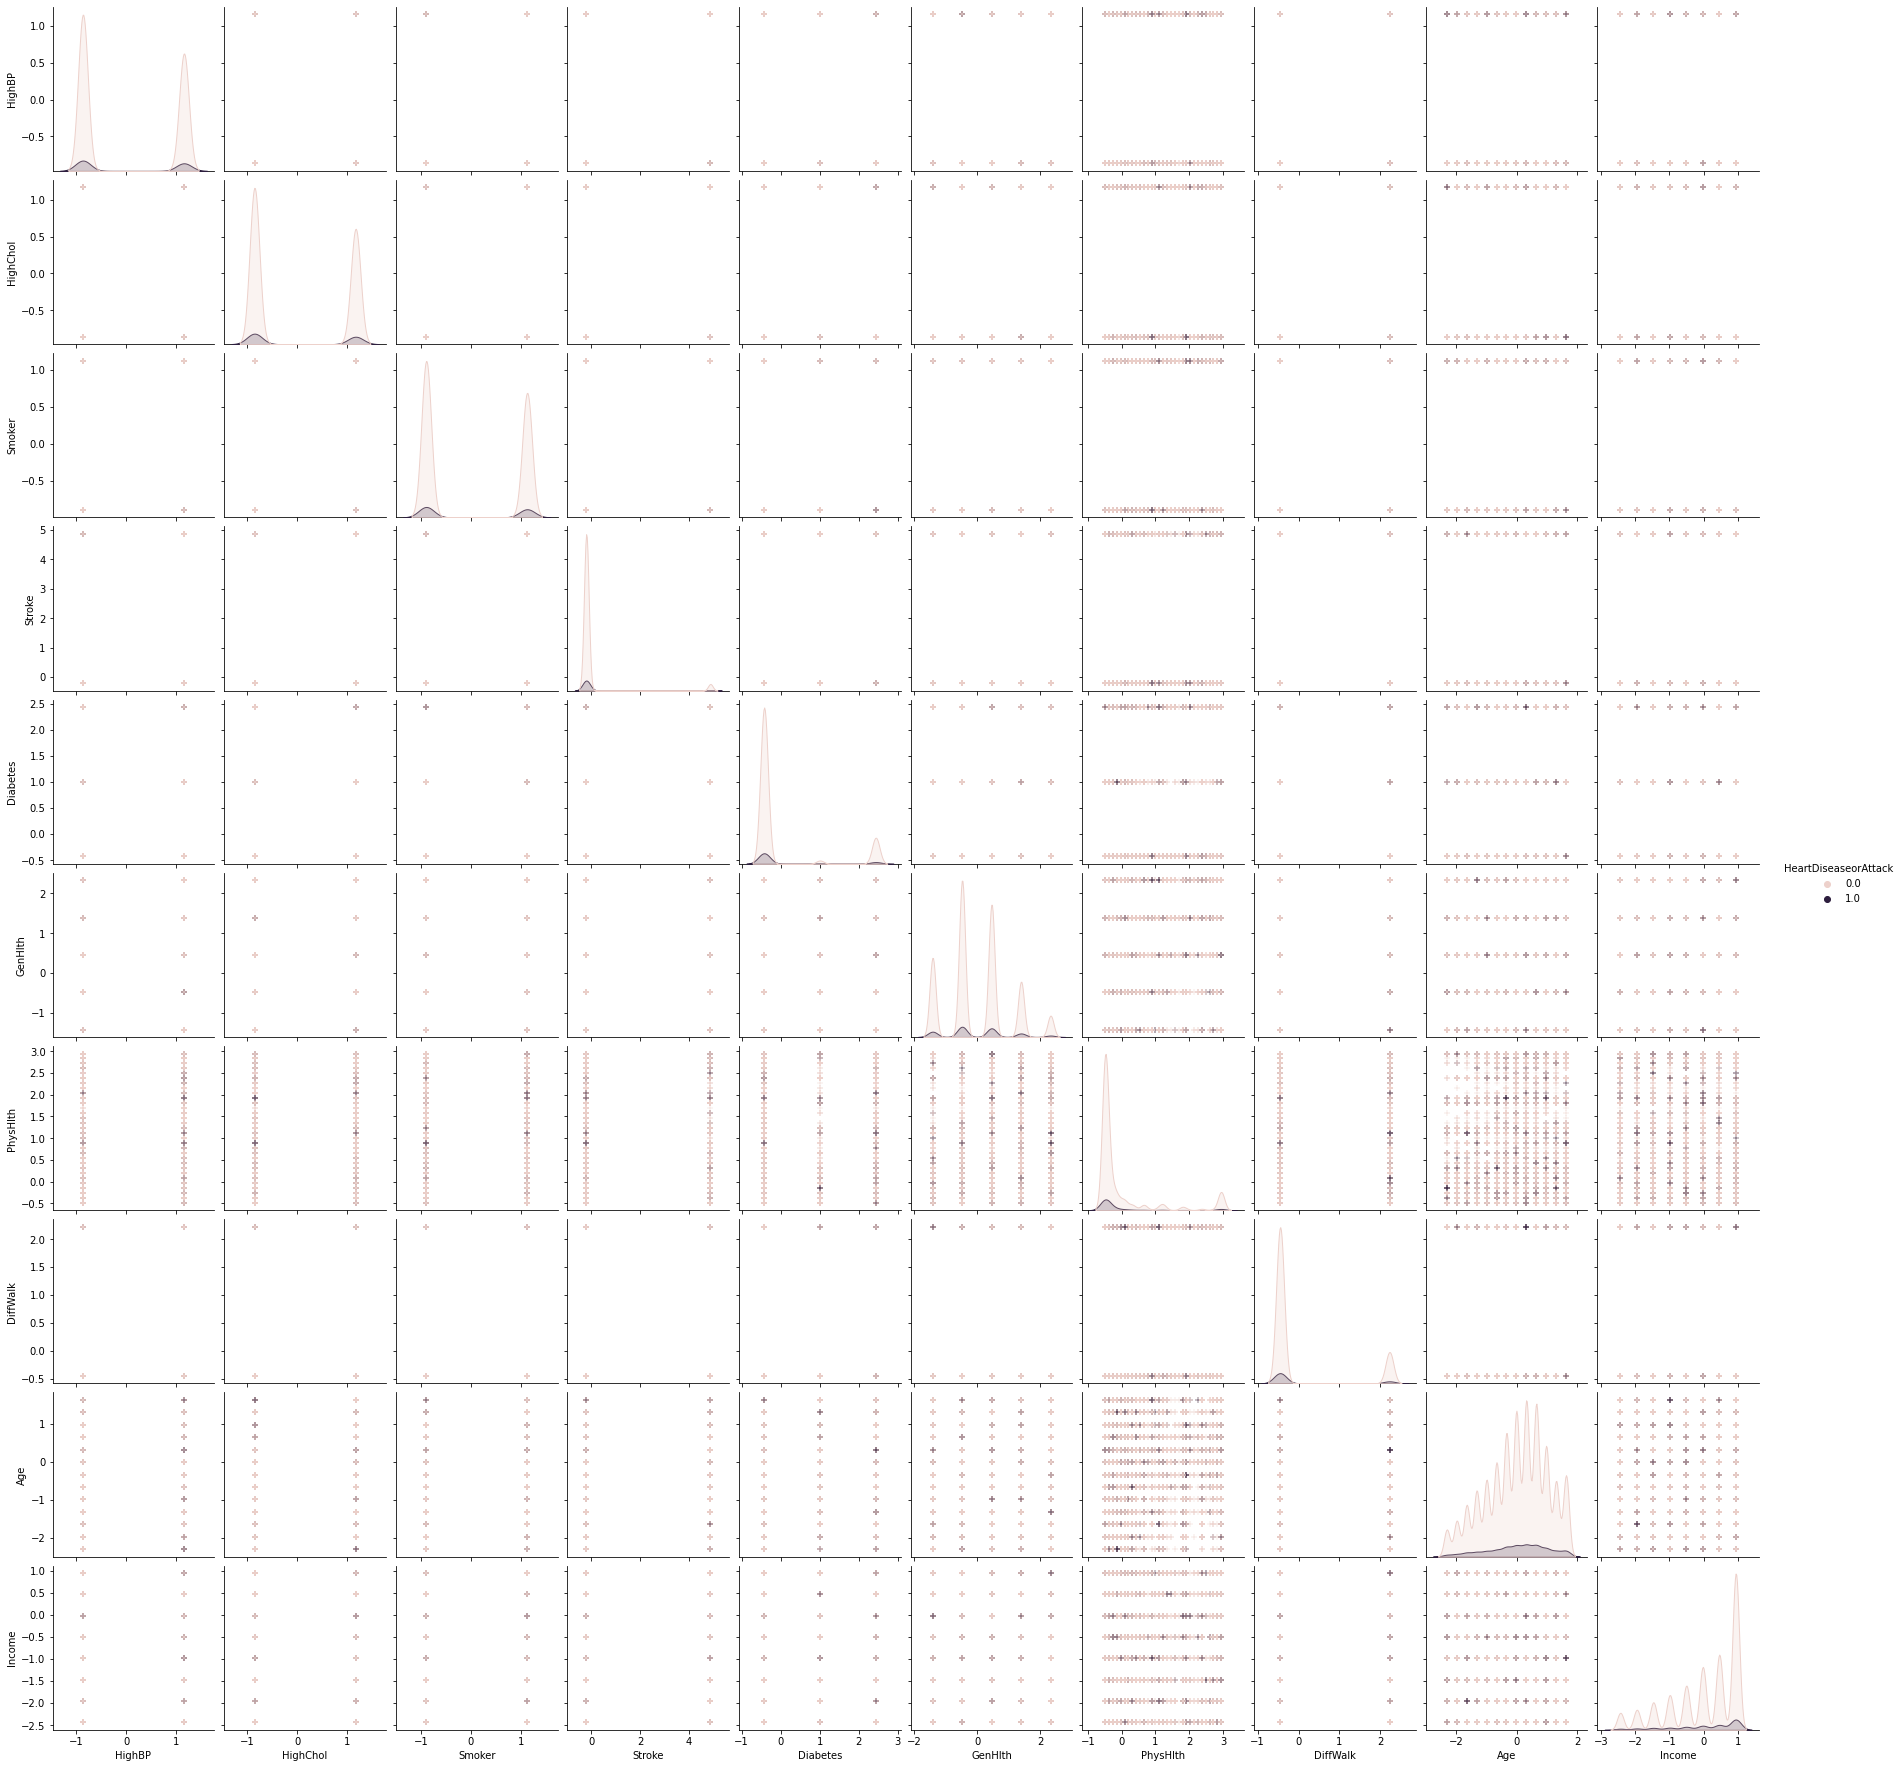

In [ ]:
# pair plot 
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "HeartDiseaseorAttack")
plt.show()

In [ ]:
from sklearn.svm import SVC


In [ ]:
svm = SVC(random_state = 1)
svm.fit(X_train, Y_train)
accuracies = {}
acc = svm.score(X_test,Y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy: {:.2f}%".format(acc))

Test Accuracy: 90.85%
